# Домашнее задание №3. Нечеткая логика

### Задание

Усовершенствуйте систему вычисления чаевых, рассмотренную на семинаре. Добавляйте новые правила, изменяйте количество нечетких множеств, и попробуйте сделать более реалистичную систему.

In [2]:
import numpy as np # подключаем numpy
import skfuzzy as fuzz # подключаем библиотеку skfuzzy
from skfuzzy import control as ctrl # и модуль control для задания переменных и правил

In [3]:
# Зададим элементы для переменных - нечетких множеств
quality = ctrl.Antecedent( # качество еды. Antecedent - значит входные переменные
    np.arange(0, 11, 1), # перечисляем элементы от 0 до 10, оценки посетителя
    'качество_еды') # название переменной - качество еды

service = ctrl.Antecedent(np.arange(0, 11, 1), 'обслуживание') # качество обслуживания

location = ctrl.Antecedent(np.arange(0, 11, 1), 'расположение')
working_hours = ctrl.Antecedent(np.arange(0, 11, 1), 'часы_работы')
waiting_time = ctrl.Antecedent(np.arange(0, 11, 1), 'время_ожидания')
cost = ctrl.Antecedent(np.arange(0, 11, 1), 'стоимость')

# выходная переменная - количество чаевых.
tip = ctrl.Consequent(# Consequent - значит результат, вывод, т.е. выходная переменная
    np.arange(0, 26, 1),# значения от 0 до 25 %
    'чаевые') # название

# # Функции принадлежности можно задать автоматически (они будут треугольные),
# # тогда библиотека сама подберет диапазоны, а мы укажем лишь количество нечетких множеств
# quality.automf(3) # три нечетких множества для входной переменной
# service.automf(3) # три нечетких множества для входной переменной
# # Если задаем автоматически, то названия множеств потеряются,
# # и будут использоваться автоматические названия "poor", "average", "good"

# # Но можно и в ручную задавать функции принадлежности, давайте для выходной переменной зададим сами
# # trimf задает треугольную функцию принадлежности, мы ей указываем
# # tip.universe - перечисление всех элементов
# # [0, 0, 13] - положения левого конца, вершины и правого конца треугольника
# tip['низкие'] = fuzz.trimf(tip.universe, [0, 0, 13]) # низкие чаевые от 0 до 13 с максимумом в нуле
# tip['средние'] = fuzz.trimf(tip.universe, [0, 13, 25]) # средние чаевые от 0 до 25 с максимумом в 13
# tip['высокие'] = fuzz.trimf(tip.universe, [13, 25, 25]) # высокие чаевые от 13 до 25 с макимумом в 25

# Определяем функции принадлежности для quality
quality['очень_плохое'] = fuzz.trimf(quality.universe, [0, 0, 2])
quality['плохое'] = fuzz.trimf(quality.universe, [0, 2, 4])
quality['среднее'] = fuzz.trimf(quality.universe, [3, 5, 7])
quality['хорошее'] = fuzz.trimf(quality.universe, [6, 8, 10])
quality['отличное'] = fuzz.trimf(quality.universe, [8, 10, 10])

# Определяем функции принадлежности для service
service['очень_плохой'] = fuzz.trimf(service.universe, [0, 0, 2])
service['плохой'] = fuzz.trimf(service.universe, [0, 2, 4])
service['средний'] = fuzz.trimf(service.universe, [3, 5, 7])
service['хороший'] = fuzz.trimf(service.universe, [6, 8, 10])
service['отличный'] = fuzz.trimf(service.universe, [8, 10, 10])

# Определяем функции принадлежности для location
location['неудобное'] = fuzz.trimf(location.universe, [0, 0, 3])
location['среднее']= fuzz.trimf(location.universe, [2, 5, 8])
location['удобное']= fuzz.trimf(location.universe, [7, 10, 10])

# Определяем функции принадлежности для working_hours
working_hours['до_вечера'] = fuzz.trimf(working_hours.universe, [0, 0, 4])
working_hours['до_ночи'] = fuzz.trimf(working_hours.universe, [3, 6, 9])
working_hours['круглосуточно'] = fuzz.trimf(working_hours.universe, [8, 10, 10])

# Определяем функции принадлежности для waiting_time
waiting_time['долго'] = fuzz.trimf(waiting_time.universe, [0, 0, 3])
waiting_time['средне'] = fuzz.trimf(waiting_time.universe, [2, 5, 8])
waiting_time['быстро'] = fuzz.trimf(waiting_time.universe, [7, 10, 10])

# Определяем функции принадлежности для cost
cost['дорого'] = fuzz.trimf(cost.universe, [0, 0, 4])
cost['средне'] = fuzz.trimf(cost.universe, [3, 5, 7])
cost['дешево']= fuzz.trimf(cost.universe, [6, 10, 10])

# Определяем функции принадлежности для tip
tip['низкие'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['средние'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['высокие'] = fuzz.trimf(tip.universe, [13, 25, 25])




d:\_petrsu\machine_learning_and_neural_networks\003_fuzzy_logic\.venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


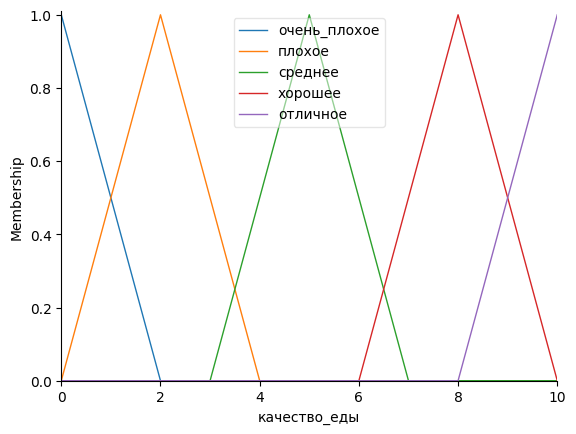

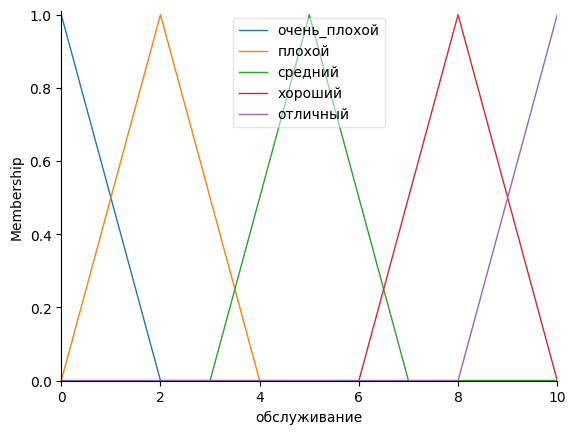

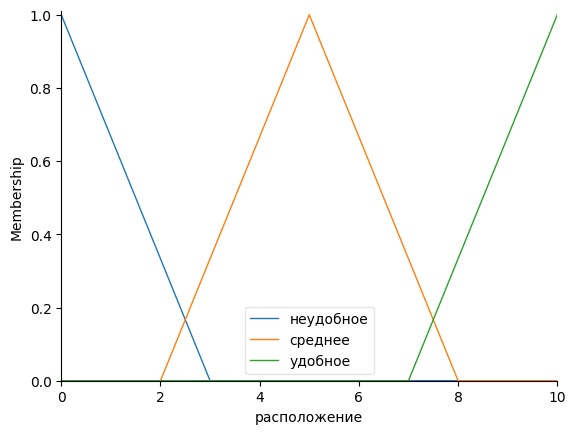

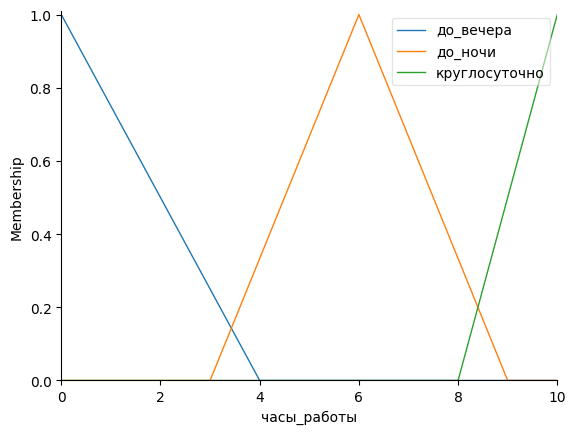

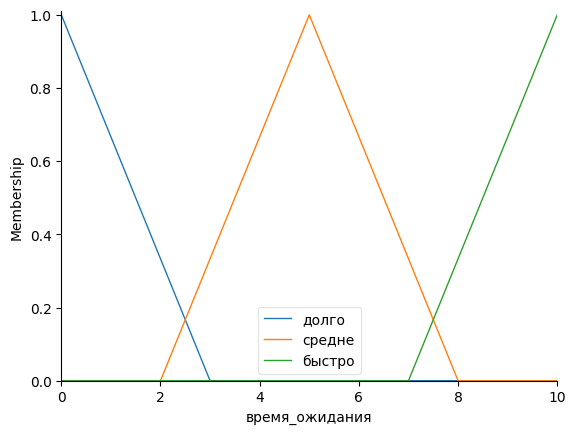

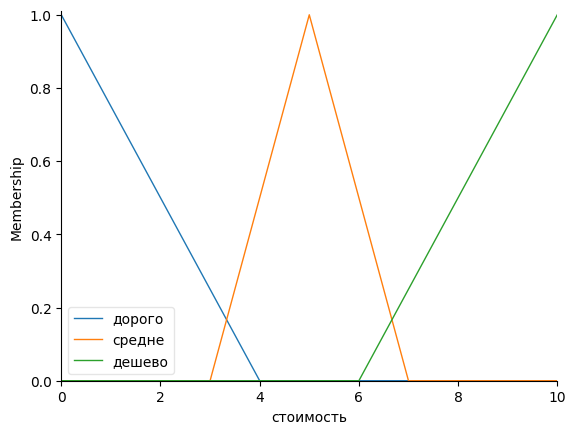

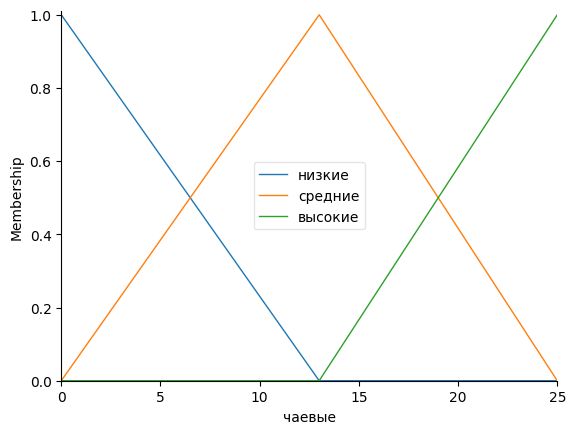

In [4]:
# # Метод .view() покажет функции принадлежности графически
# quality['среднее'].view() # покажет все, но выделит множество 'average' (это, как мы помним, автоматическое название множества)
# service.view() # покажет все
# tip.view() # покажет все

# Просмотр графиков функций принадлежности 
quality.view()
service.view()
location.view()
working_hours.view()
waiting_time.view()
cost.view()
tip.view()

In [5]:

#############################################################################################
# НЕЧЕТКИЕ ПРАВИЛА
""""
Зададим правила, используя метод .Rule()
1. ЕСЛИ еда quality плохая poor И обслуживание service плохое poor И цена generous, ТОГДА чаевые tip низкие low
2. ЕСЛИ еда quality плохая poor ИЛИ обслуживание service плохое poor (но не оба одновременно) И цена generous, ТОГДА чаевые tip средние medium
3. ЕСЛИ еда quality плохая poor ИЛИ обслуживание service плохое poor И цена НЕ generous ИЛИ цена greedy, ТОГДА чаевые tip низкие low
...
"""

rule1 = ctrl.Rule(quality['плохое'] & service['плохой'] & cost['дешево'], tip['низкие'])
rule2 = ctrl.Rule(~(quality['плохое'] & service['плохой']) & (quality['плохое'] | service['плохой']) & cost['средне'], tip['средние'])
rule3 = ctrl.Rule(((quality['плохое'] | service['плохой']) & ~cost['дорого']) | cost['дешево'], tip['низкие'])
rule4 = ctrl.Rule(service['средний'] & cost['средне'], tip['средние'])
rule5 = ctrl.Rule(service['средний'] & cost['дорого'], tip['средние'])
rule6 = ctrl.Rule((service['хороший'] | quality['хорошее']) & ~cost['дешево'], tip['высокие'])
rule7 = ctrl.Rule(quality['очень_плохое'] & service['очень_плохой'], tip['низкие'])
rule8 = ctrl.Rule(quality['отличное'] & service['отличный'] & ~cost['дешево'], tip['высокие'])
rule9 = ctrl.Rule(quality['хорошее'] & service['средний'] & cost['средне'], tip['средние'])
rule10 = ctrl.Rule(service['плохой'] & cost['дешево'], tip['низкие'])
rule11 = ctrl.Rule(location['неудобное'] & waiting_time['быстро'], tip['низкие'])
rule12 = ctrl.Rule(location['удобное']& waiting_time['долго'], tip['высокие'])
rule13 = ctrl.Rule(working_hours['круглосуточно'] & cost['дорого'], tip['высокие'])



In [6]:
# задав все переменные и правила, соберем их в единую систему методом ControlSystem()
# это название не просто так - подобные системы применяются для управления.
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Созданная система управления абстрактна,
# давайте сделаем ее симулятор,
# который уже можно будет использовать для расчетов: ControlSystemSimulation()
tipping = ctrl.ControlSystemSimulation(tipping_ctrl) #

In [7]:
# Теперь можно просимулировать эту систему,
# зададим входы

# Ввод данных для тестирования системы
tipping.input['качество_еды'] = 5  # Среднее качество еды
tipping.input['обслуживание'] = 6  # Хорошее обслуживание
tipping.input['расположение'] = 8  # Хорошее расположение
tipping.input['часы_работы'] = 7  # Долгие часы работы
tipping.input['время_ожидания'] = 3  # Короткое ожидание заказа
tipping.input['стоимость'] = 2  # Дешёвая стоимость

# Рассчитаем систему правил с этими входами
tipping.compute() # обрабатываются все правила ....

# Вывод результата
print(f"Чаевые: {tipping.output['чаевые']:.2f} %")


Чаевые: 12.61 %


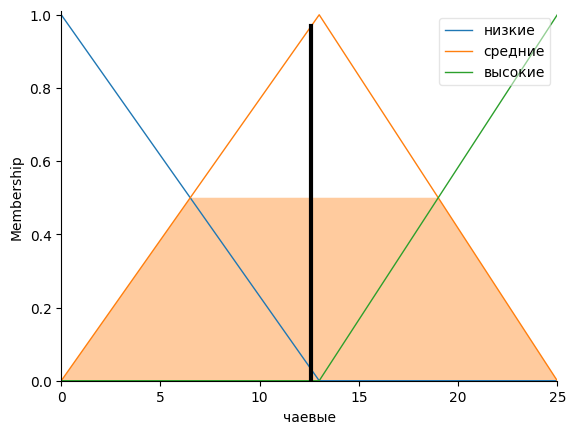

In [8]:
tip.view(sim=tipping)